<b><h2>1. Import Module</h2></b>

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import os

/Users/andreew/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


<b><h2>2. Load Dataset</h2></b>

In [3]:
imagePaths = 'dataset/'
label_list = ['duku', 'langsat']
data = []
labels = []

<b><h2>3. Data Preprocessing</h2></b>

In [4]:
for label in label_list:
    folder_path = os.path.join(imagePaths, label)
    image_files = glob.glob(os.path.join(folder_path, '*.jpg'))
    print(f" Memuat {len(image_files)} gambar dari '{folder_path}'")

    for imagePath in image_files:
        image = cv2.imread(imagePath)
        if image is None:
            print(f" Gagal membaca: {imagePath}")
            continue
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

 Memuat 0 gambar dari 'dataset/duku'
 Memuat 90 gambar dari 'dataset/langsat'


In [5]:
np.array(data).shape


(90, 32, 32, 3)

In [6]:
# mengubah type data dari list menjadi array dan nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)


In [7]:
print(labels)

['langsat' 'langsat' 'langsat' 'langsat' 'langsat' 'langsat' 'langsat'
 'langsat' 'langsat' 'langsat' 'langsat' 'langsat' 'langsat' 'langsat'
 'langsat' 'langsat' 'langsat' 'langsat' 'langsat' 'langsat' 'langsat'
 'langsat' 'langsat' 'langsat' 'langsat' 'langsat' 'langsat' 'langsat'
 'langsat' 'langsat' 'langsat' 'langsat' 'langsat' 'langsat' 'langsat'
 'langsat' 'langsat' 'langsat' 'langsat' 'langsat' 'langsat' 'langsat'
 'langsat' 'langsat' 'langsat' 'langsat' 'langsat' 'langsat' 'langsat'
 'langsat' 'langsat' 'langsat' 'langsat' 'langsat' 'langsat' 'langsat'
 'langsat' 'langsat' 'langsat' 'langsat' 'langsat' 'langsat' 'langsat'
 'langsat' 'langsat' 'langsat' 'langsat' 'langsat' 'langsat' 'langsat'
 'langsat' 'langsat' 'langsat' 'langsat' 'langsat' 'langsat' 'langsat'
 'langsat' 'langsat' 'langsat' 'langsat' 'langsat' 'langsat' 'langsat'
 'langsat' 'langsat' 'langsat' 'langsat' 'langsat' 'langsat']


In [8]:
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<b><h2>4. Split Dataset</h2></b>

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42)

In [10]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (72, 32, 32, 3)
Ukuran data test = (18, 32, 32, 3)


<b><h2>5. Build CNN Architecture</h2></b>

In [11]:
model = Sequential()

model.add(InputLayer(input_shape=[32, 32, 3]))
model.add(Conv2D(filters=32, kernel_size=2, strides=1,
          padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=50, kernel_size=2, strides=1,
          padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


/Users/andreew/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [12]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 50)     │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,638,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,646,291 (6.28 MB)

 Trainable params: 1,646,291 (6.28 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# menentukan hyperparameter
lr = 0.001
max_epochs = 3
opt_funct = Adam(learning_rate=lr)


In [14]:
# compile arsitektur yang telah dibuat
model.compile(loss='binary_crossentropy',
              optimizer=opt_funct,
              metrics=['accuracy'])


<b><h2>6. Train Model</h2></b>

In [15]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test),
              epochs=max_epochs, batch_size=32)


Epoch 1/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.8507 - loss: 0.4094 - val_accuracy: 1.0000 - val_loss: 6.2002e-04
Epoch 2/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 3.3864e-04 - val_accuracy: 1.0000 - val_loss: 1.4800e-06
Epoch 3/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 8.7217e-07 - val_accuracy: 1.0000 - val_loss: 1.1156e-08


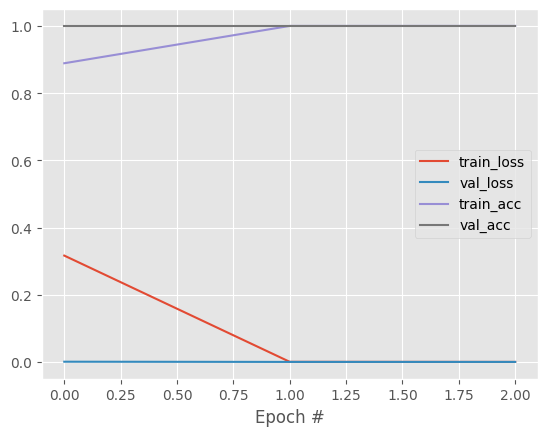

In [16]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()


<b><h2>7. Evaluate the Model</h2></b>

In [17]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(int)
print(classification_report(y_test, target, target_names=label_list))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


ValueError: Number of classes, 1, does not match size of target_names, 2. Try specifying the labels parameter

<b><h2>8. Test Model</h2></b>

In [19]:
# uji model menggunakan image lain
queryPath = 'test_data/langsat7.jpg'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)

print(q_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[9.616513e-10]]


<b><h2>9. Result</h2></b>

In [20]:
if q_pred <= 0.5:
    target = "Duku"
else:
    target = "Langsat"

text = "{}".format(target)

# Ukuran font besar, tapi masih masuk akal
font_scale = 4.0
thickness = 7
font = cv2.FONT_HERSHEY_SIMPLEX

# Hitung ukuran teks
(text_width, text_height), baseline = cv2.getTextSize(text, font, font_scale, thickness)

# Dapatkan ukuran gambar
height, width = output.shape[:2]

# Hitung posisi teks agar di tengah
x = (width - text_width) // 2
y = (height + text_height) // 2

cv2.putText(output, text, (x, y), font, font_scale, (0, 0, 255), thickness)

cv2.imshow('Output', output)

key = cv2.waitKey(0) & 0xFF
if key == ord('q'):
    cv2.destroyAllWindows()
    cv2.waitKey(1)


2025-06-17 22:37:43.453 Python[17642:226498] WARNING: Secure coding is automatically enabled for restorable state! However, not on all supported macOS versions of this application. Opt-in to secure coding explicitly by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState:.


In [ ]:
#model.save('image_classification.h5')